In [1]:
import pycuda.autoinit
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
plt.style.use('dark_background')

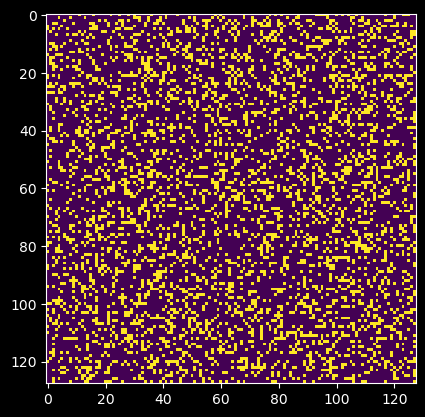

In [2]:
with open('game_of_life.cu') as file:
    kernel_code = file.read()


ker = SourceModule(str(kernel_code))

conway_ker = ker.get_function("conway_ker")
     

def update_gpu(frameNum, img, newLattice_gpu, lattice_gpu, N):
    
    conway_ker(  newLattice_gpu, lattice_gpu, grid=(int(N/32), int(N/32)), block=(32,32,1) )
    img.set_data(newLattice_gpu.get())    
    lattice_gpu[:] = newLattice_gpu[:]
    return img


# set lattice size
N = 128

lattice = np.int32( np.random.choice([1,0], N*N, p=[0.25, 0.75]).reshape(N, N) )
lattice_gpu = gpuarray.to_gpu(lattice)

newLattice_gpu = gpuarray.empty_like(lattice_gpu)        

fig, ax = plt.subplots()
img = ax.imshow(lattice_gpu.get(), interpolation='nearest')
ani = animation.FuncAnimation(fig, update_gpu, fargs=(img, newLattice_gpu, lattice_gpu, N), interval=0, frames=1000)

plt.show()

In [3]:
%matplotlib notebook